In [1]:
from pyscal.core import System
from pyscal.crystal_structures import Structure
from pyscal_rdf.json_io import write_file
from pyscal_rdf.rdfutils import convert_to_dict
from pyscal_rdf.visualize import visualize_graph
from pyscal_rdf.graph import StructureGraph

Update hedgedoc [here](https://iffmd.fz-juelich.de/BRIkKGLlQduS8dA0sXKoZw)

## Creating structure from pyscal

In [2]:
struct = Structure()

In [3]:
sys = struct.lattice.l12(element=['Al', 'Ni'], 
                         lattice_constant=3.57)

['Al', 'Ni']


In [4]:
sysdict = convert_to_dict(sys)

In [5]:
write_file("structure.json", sysdict)

## RDFLIB Mapping

Assuming one structure dictionary

In [3]:
from rdflib import Graph, Literal, Namespace, XSD, RDF, RDFS, BNode, URIRef, FOAF, SKOS, DCTERMS

In [5]:
CMSO = Namespace("https://purls.helmholtz-metadaten.de/cmso/")

We use `BNode` for the moment, is it really the best option? Please check

- Control decimal points
- Add references
- Plot: add fig size
- Plot: add font size
- Plot: add duplicate labels
- Dont hardcode lattice angles

`DCTERMS.http://purl.org/dc/terms/bibliographicCitation`

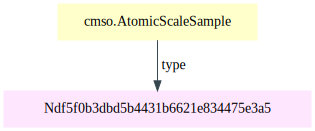

In [5]:
g = StructureGraph()
g.add_sample(name=None)
g.visualise()

In [8]:
chem_comp = ["=".join([x, str(y)]) for x,y in zip(sysdict["ChemicalCompositionElement"], sysdict["ChemicalCompositionRatio"])]


In [15]:
g = Graph()
sample_01 = BNode('Sample_01')
g.add((sample_01, RDF.type, CMSO.AtomicScaleSample))
#g.add((sample, SKOS.altLabel, Literal("A")))

material_01 = BNode('Material_01')
g.add((sample_01, CMSO.hasMaterial, material_01))
g.add((material_01, RDF.type, CMSO.CrystallineMaterial))

chemical_composition_01 = BNode('ChemicalComposition_01')
g.add((material_01, CMSO.hasComposition, chemical_composition_01))
g.add((chemical_composition_01, RDF.type, CMSO.ChemicalComposition))
g.add((chemical_composition_01, CMSO.hasElementRatio, Literal(chem_comp[0], datatype=XSD.string)))
g.add((chemical_composition_01, CMSO.hasElementRatio, Literal(chem_comp[1], datatype=XSD.string)))

simulation_cell_01 = BNode('SimulationCell_01')
g.add((sample_01, CMSO.hasSimulationCell, simulation_cell_01))
g.add((simulation_cell_01, RDF.type, CMSO.SimulationCell))
g.add((simulation_cell_01, CMSO.hasVolume, Literal(sysdict["CellVolume"], datatype=XSD.float)))
g.add((sample_01, CMSO.hasNumberOfAtoms, Literal(sysdict["NumberOfAtoms"], datatype=XSD.integer)))

simulation_cell_length_01 = BNode('SimulationCellLength_01')
g.add((simulation_cell_01, CMSO.hasLength, simulation_cell_length_01))
g.add((simulation_cell_length_01, RDF.type, CMSO.SimulationCellLength))
g.add((simulation_cell_length_01, CMSO.hasLength_x, Literal(sysdict["SimulationCellLengthX"], datatype=XSD.float)))
g.add((simulation_cell_length_01, CMSO.hasLength_y, Literal(sysdict["SimulationCellLengthY"], datatype=XSD.float)))
g.add((simulation_cell_length_01, CMSO.hasLength_z, Literal(sysdict["SimulationCellLengthZ"], datatype=XSD.float)))

simulation_cell_vector_01 = BNode('SimulationCellVector_01')
g.add((simulation_cell_01, CMSO.hasVector, simulation_cell_vector_01))
g.add((simulation_cell_vector_01, RDF.type, CMSO.SimulationCellVector))
g.add((simulation_cell_vector_01, CMSO.hasComponent_x, Literal(sysdict["SimulationCellVectorA"][0], datatype=XSD.float)))
g.add((simulation_cell_vector_01, CMSO.hasComponent_y, Literal(sysdict["SimulationCellVectorA"][1], datatype=XSD.float)))
g.add((simulation_cell_vector_01, CMSO.hasComponent_z, Literal(sysdict["SimulationCellVectorA"][2], datatype=XSD.float)))

simulation_cell_vector_02 = BNode('SimulationCellVector_02')
g.add((simulation_cell_01, CMSO.hasVector, simulation_cell_vector_02))
g.add((simulation_cell_vector_02, RDF.type, CMSO.SimulationCellVector))
g.add((simulation_cell_vector_02, CMSO.hasComponent_x, Literal(sysdict["SimulationCellVectorB"][0], datatype=XSD.float)))
g.add((simulation_cell_vector_02, CMSO.hasComponent_y, Literal(sysdict["SimulationCellVectorB"][1], datatype=XSD.float)))
g.add((simulation_cell_vector_02, CMSO.hasComponent_z, Literal(sysdict["SimulationCellVectorB"][2], datatype=XSD.float)))

simulation_cell_vector_03 = BNode('SimulationCellVector_03')
g.add((simulation_cell_01, CMSO.hasVector, simulation_cell_vector_03))
g.add((simulation_cell_vector_03, RDF.type, CMSO.SimulationCellVector))
g.add((simulation_cell_vector_03, CMSO.hasComponent_x, Literal(sysdict["SimulationCellVectorC"][0], datatype=XSD.float)))
g.add((simulation_cell_vector_03, CMSO.hasComponent_y, Literal(sysdict["SimulationCellVectorC"][1], datatype=XSD.float)))
g.add((simulation_cell_vector_03, CMSO.hasComponent_z, Literal(sysdict["SimulationCellVectorC"][2], datatype=XSD.float)))

simulation_cell_angle_01 = BNode('SimulationCellAngle_01')
g.add((simulation_cell_01, CMSO.hasAngle, simulation_cell_angle_01))
g.add((simulation_cell_angle_01, RDF.type, CMSO.SimulationCellAngle))
g.add((simulation_cell_angle_01, CMSO.hasAngle_alpha, Literal(sysdict["SimulationCellAngleAlpha"], datatype=XSD.float)))
g.add((simulation_cell_angle_01, CMSO.hasAngle_beta, Literal(sysdict["SimulationCellAngleBeta"], datatype=XSD.float)))
g.add((simulation_cell_angle_01, CMSO.hasAngle_gamma, Literal(sysdict["SimulationCellAngleGamma"], datatype=XSD.float)))

crystal_structure_01 = BNode('CrystalStructure_01')
g.add((material_01, CMSO.hasStructure, crystal_structure_01))
g.add((crystal_structure_01, RDF.type, CMSO.CrystalStructure))
g.add((crystal_structure_01, CMSO.hasAltName, Literal(sysdict["CrystalStructureName"], datatype=XSD.string)))

space_group_01 = BNode('SpaceGroup_01')
g.add((material_01, CMSO.hasSpaceGroup, space_group_01))
g.add((space_group_01, RDF.type, CMSO.SpaceGroup))
g.add((space_group_01, CMSO.hasSpaceGroupSymbol, Literal(sysdict["SpaceGroupSymbol"], datatype=XSD.string)))
g.add((space_group_01, CMSO.hasSpaceGroupNumber, Literal(sysdict["SpaceGroupNumber"], datatype=XSD.integer)))

unit_cell_01 = BNode("UnitCell_01")
g.add((crystal_structure_01, CMSO.hasUnitCell, unit_cell_01))
g.add((unit_cell_01, RDF.type, CMSO.UnitCell))

lattice_parameter_01 = BNode("LatticeParameter_01")
g.add((unit_cell_01, CMSO.hasLatticeParamter, lattice_parameter_01))
g.add((lattice_parameter_01, RDF.type, CMSO.LatticeParameter))
g.add((lattice_parameter_01, CMSO.hasLength_x, Literal(sysdict["LatticeParameter"], datatype=XSD.float)))
g.add((lattice_parameter_01, CMSO.hasLength_y, Literal(sysdict["LatticeParameter"], datatype=XSD.float)))
g.add((lattice_parameter_01, CMSO.hasLength_z, Literal(sysdict["LatticeParameter"], datatype=XSD.float)))

lattice_angle_01 = BNode('LatticelAngle_01')
g.add((unit_cell_01, CMSO.hasAngle, lattice_angle_01))
g.add((lattice_angle_01, RDF.type, CMSO.LatticeAngle))
g.add((lattice_angle_01, CMSO.hasAngle_alpha, Literal(90, datatype=XSD.float)))
g.add((lattice_angle_01, CMSO.hasAngle_beta, Literal(90, datatype=XSD.float)))
g.add((lattice_angle_01, CMSO.hasAngle_gamma, Literal(90, datatype=XSD.float)))

<Graph identifier=Nc439876529ac4c03b5cd58ed288d2569 (<class 'rdflib.graph.Graph'>)>

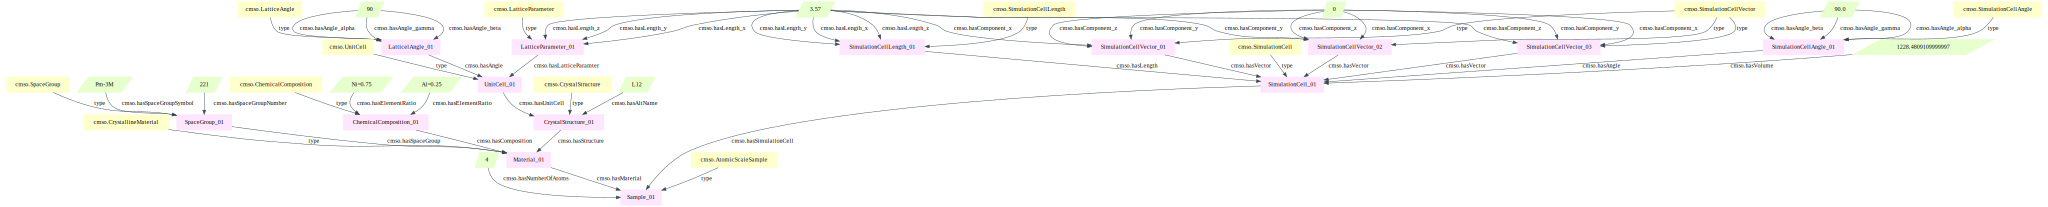

In [16]:
visualize_graph(g)

In [ ]:
Coordinate_Vector = URIRef("https://w3id.org/mdo/structure/CoordinateVector")
Lattice = URIRef("https://purls.helmholtz-metadaten.de/disos/cso#Lattice")
Structure

In [ ]:

g.add((Coordinate_Vector, MDO.X_axisCoordinate, Literal(data["X_AxisCoordinate"])))
g.add((Coordinate_Vector, MDO.Y_axisCoordinate, Literal(data["Y_AxisCoordinate"])))
g.add((Coordinate_Vector, MDO.Z_axisCoordinate, Literal(data["Z_AxisCoordinate"])))

In [ ]:
with open("dump-ld.json", "w") as fout:
    fout.write(g.serialize(format="json-ld"))

In [ ]:
print(g.serialize(format="json-ld"))

- Map the terms (see above)
- Terms for type annotations
- Use BNode to add multiple structures
- Add visualisation
- Space group calculation
- try saving to database
- Query the graph (range queries possible?)
- Make a package out of it
- Extend....

## Examples

### POSCAR

In [ ]:
sys = System("al_data/Al.poscar", format="poscar")

In [ ]:
convert_to_dict(sys)
write_file("dump", convert_to_dict(sys))

In [ ]:
sys.composition

### LAMMPS - dump

In [ ]:
sys = System("al_data/Al.dump")

In [ ]:
convert_to_dict(sys)
write_file("dump2", convert_to_dict(sys))

In [ ]:
sys.composition

### CIF/ ASE

In [ ]:
from ase.io import read

In [ ]:
aseobj = read("al_data/Al.cif", format="cif")

In [ ]:
sys = System(aseobj, format="ase")

In [ ]:
convert_to_dict(sys)
write_file("dump3", convert_to_dict(sys))

In [ ]:
data = convert_to_dict(sys)